In [24]:
import time
import torch
from matplotlib import pyplot as plt

import numpy as np

import pandas as pd

from zse.collections import *
from zse.utilities import *

from ase.io import read, write
from matplotlib import cm

from collections import Counter


from sklearn.cluster import DBSCAN

from collections import defaultdict

from mpl_toolkits import mplot3d

In [2]:
def get_fw_data(file,code):
    
    # file is the file we want to read from
    # code is the IZA framework code you want data on
    
    file = open(file,'r')
    data = file.readlines()
    file.close()
    
    for i,line in enumerate(data):
        fields = line.split()
        if fields[0] == code:
            start = i
            break
    
    # go through fw chunk and get data
    
    t_sites = {}
    o_sites = {}
    for i,line in enumerate(data[start+1:]):
        line = line.rstrip(' \n')

        # get the t site rings
        
        if 'T' in line and ':' in line:
            fields = line.split(':')
            t_sites[fields[0]]=fields[1]                
        
        # get the o site rings
        
        if 'O' in line and ':' in line:
            fields = line.split(':')
            o_sites[fields[0]]=fields[1]        
        
        fields = line.split()
        if fields[0] == 'Framework':
            end = i+start-1
            break

    return(t_sites,o_sites)    

In [3]:
def numofrings(file,code):
    #might already be a function called counter so come up with very unique names otherwsie function overrides it -- isseue with kernel resets
    '''takes in the file and code name and returns how many of each ring type is present
    arguments: file: dataset
                code: which zeolite is being observed
    returns: number of each rings inside'''
    
    #call function to get data
    tsites, osites = get_fw_data(file,code)
    
    for t in tsites:
        #print('check 1')
        #resets dictionary each tsite
        tsite_dict = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
        #ways to make dictionary without knowing what it is 
        
        #make into vector not dictionary 
        
        #restarts j to 1 to check for ring size
        j = 1
        #go through all of the one tsite
        for i in range(0,len(tsites[t])-2,2):
            #print('check 2')
            #set yes to true
            print('i is',i)
            yes = True
            while yes:
                #print('check 3')
                #print(tsites[t][i])
                #print(int(tsites[t][i]) == j)
                #print(tsite_dict[j])
                #number of rings matches dictionary component
                if int(tsites[t][i]) == j:
                    print('check 4')
                    tsite_dict[j] = tsite_dict[j] + 1
                    #end while loop 
                    yes = False
                #increase j 
                else:
                    
                    j = j + 1
                    print('j is',j)
        print(t,tsite_dict)
        

def nringsvector(code,file):
    '''takes in the file and code name and returns how many of each ring type is present
    arguments: file: dataset
                code: which zeolite is being observed
    returns: vector of number of rings for each tsite'''
    
    #get site data
    tsites, osites = get_fw_data(file,code)
    
    #create empty vector
    A = np.zeros([len(tsites),21])
    
    #coutner for which row of the matrix you are in
    k=0 
    
    #go through each tsite
    for t in tsites:
        #initialize accumulator 
        j=1
        
        #make list of number of rings
        tsites_list = tsites[t].split('_')
        #go through the string for each t list
        for i in range(0,len(tsites_list)):
            #make the while loop true each for loop
            yes = True
            while yes:
                if int(tsites_list[i]) == j:
                    A[k][j] = A[k][j] + 1
                    #end while loop 
                    yes = False
                #increase j 
                else:
                    j = j + 1
        #increase row
        k = k +1 
    return A



In [4]:
def assemblematrix(file):
    fws = get_all_fws()
    fws = fws[1:]
    B = nringsvector('ABW',file)
    for code in fws:
        C = nringsvector(code,file)
        B = np.append(B, C, axis=0)
    return B


In [5]:
#DBscan of crum rings
A = assemblematrix('../Data/crum_rings.txt')
clustering = DBSCAN(eps=1,min_samples=5).fit(A)
cluster = clustering.labels_

In [6]:
sorted_clusters = {-1:[],0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[],30:[],31:[],32:[],33:[]}

In [7]:
fws = get_all_fws()

#moves 
start = 0
#go through each framework 
for code in fws:
    #get tsites
    tsites, osites = get_fw_data('../Data/crum_rings.txt',code)
    for t in tsites:
        #combine the framework abbreviatin with the tsite
        name = code + t
        sorted_clusters[cluster[start]].append(name)
        start = start + 1

cdata = []
for keys in sorted_clusters:
    cdata.append(sorted_clusters[keys])

NameError: name 'file' is not defined

In [8]:
#testing to see if Tsite make it a similar cluster
#use cljsters 
dict_fws = {}
count = 0
for code in fws:
    dict_fws[code] = []
    tsites, osites = get_fw_data('../Data/crum_rings.txt',code)
    for t in tsites:
        dict_fws[code].append(cluster[count])
        count = count + 1

1460


In [9]:
#calculates percent of the Tsites that were clustered into at least 1 group and if all tsites were in the same group
atleast1 = 0
allsame = 0

#for at least one group
for k in dict_fws:
    #exclude frameworks with only 1 tsite
    if len(dict_fws[k]) > 1:
        #boolean for while loop
        atleast1_bool = True
        #starting point to check through each list in the dictionary
        n = 0
        temp = dict_fws[k]
        #runs through entire list and if a match is found it exists the while loop
        while atleast1_bool:
            if temp[n] == temp[n+1]:
                atleast1 = atleast1 + 1
                atleast1_bool = False
            else:
                n = n + 1
                if n+1 == len(dict_fws[k]):
                    atleast1_bool = False
print(atleast1/len(dict_fws))


#for all are the same
for k in dict_fws:
    #exclude frameworks with only 1 tsite
    if len(dict_fws[k]) > 1:
        #if the mean of all is the same unless the endpoints are different it must be all the same Tsites in the framewrok
        avg = sum(dict_fws[k])/len(dict_fws[k])
        if avg == dict_fws[k][0]:
            #could check to make sure its not perfectly balanced
            allsame = allsame + 1
print(allsame/len(dict_fws))

0.8300395256916996
0.3794466403162055


In [11]:
#sastre

B = assemblematrix('../Data/sastre_rings.txt')
clustering_sastre = DBSCAN(eps=1,min_samples=5).fit(B)
cluster_sastre = clustering_sastre.labels_
sorted_clusters_sastre = {-1:[],0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[],30:[],31:[],32:[],33:[]}
fws = get_all_fws()

start = 0
for code in fws:
    tsites, osites = get_fw_data('../Data/sastre_rings.txt',code)
    for t in tsites:
        name = code + t
        sorted_clusters_sastre[cluster_sastre[start]].append(name)
        start = start + 1
sdata = []
for keys in sorted_clusters_sastre:
    sdata.append(sorted_clusters_sastre[keys])

#testing to see if Tsite make it a similar cluster
#use cljsters 
dict_fws = {}
count = 0
for code in fws:
    dict_fws[code] = []
    tsites, osites = get_fw_data('../Data/sastre_rings.txt',code)
    for t in tsites:
        dict_fws[code].append(cluster_sastre[count])
        count = count + 1

atleast1 = 0
allsame = 0


for k in dict_fws:
    if len(dict_fws[k]) > 1:
        atleast1_bool = True
        n = 0
        temp = dict_fws[k]
        while atleast1_bool:
            if temp[n] == temp[n+1]:
                atleast1 = atleast1 + 1
                atleast1_bool = False
            else:
                n = n + 1
                if n+1 == len(dict_fws[k]):
                    atleast1_bool = False
print(atleast1/len(dict_fws))



for k in dict_fws:
    if len(dict_fws[k]) > 1:
        avg = sum(dict_fws[k])/len(dict_fws[k])
        if avg == dict_fws[k][0]:
            #could check to make sure its not perfectly balanced
            allsame = allsame + 1
print(allsame/len(dict_fws))

0.7865612648221344
0.34782608695652173


In [17]:
#goetzke

C = assemblematrix('../Data/goetzke_rings.txt')
clustering_goetzke = DBSCAN(eps=1,min_samples=5).fit(C)
cluster_goetzke = clustering_goetzke.labels_
sorted_clusters_goetzke = {-1:[],0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[],30:[],31:[],32:[],33:[]}

sorted_clusters_goetzke = defaultdict(list) #inside parentheses put the type of value ie list int
#for x in range(max(cluster_goetzke)):
#    sorted_clusters_goetzke[x] = '' 

fws = get_all_fws()


start = 0
for code in fws:
    tsites, osites = get_fw_data('../Data/goetzke_rings.txt',code)
    for t in tsites:
        name = code + t
        sorted_clusters_goetzke[cluster_goetzke[start]].append(name)
        start = start + 1
gdata = []
for keys in sorted_clusters_goetzke:
    gdata.append(sorted_clusters_goetzke[keys])

#testing to see if Tsite make it a similar cluster
#use cljsters 
dict_fws = {}
count = 0
for code in fws:
    dict_fws[code] = []
    tsites, osites = get_fw_data('../Data/goetzke_rings.txt',code)
    for t in tsites:
        dict_fws[code].append(cluster_goetzke[count])
        count = count + 1

atleast1 = 0
allsame = 0


for k in dict_fws:
    if len(dict_fws[k]) > 1:
        atleast1_bool = True
        n = 0
        temp = dict_fws[k]
        while atleast1_bool:
            if temp[n] == temp[n+1]:
                atleast1 = atleast1 + 1
                atleast1_bool = False
            else:
                n = n + 1
                if n+1 == len(dict_fws[k]):
                    atleast1_bool = False
print(atleast1/len(dict_fws))



for k in dict_fws:
    if len(dict_fws[k]) > 1:
        avg = sum(dict_fws[k])/len(dict_fws[k])
        if avg == dict_fws[k][0]:
            #could check to make sure its not perfectly balanced
            allsame = allsame + 1
print(allsame/len(dict_fws))

0.841897233201581
0.49407114624505927


In [18]:
#vertex

C = assemblematrix('../Data/vertex_rings.txt')
clustering_vertex = DBSCAN(eps=1,min_samples=5).fit(C)
cluster_vertex = clustering_vertex.labels_
sorted_clusters_vertex = {-1:[],0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[],30:[],31:[],32:[],33:[]}
fws = get_all_fws()


start = 0
for code in fws:
    tsites, osites = get_fw_data('../Data/vertex_rings.txt',code)
    for t in tsites:
        name = code + t
        sorted_clusters_vertex[cluster_vertex[start]].append(name)
        start = start + 1
vdata = []
for keys in sorted_clusters_vertex:
    vdata.append(sorted_clusters_vertex[keys])

#testing to see if Tsite make it a similar cluster
#use cljsters 
dict_fws = {}
count = 0
for code in fws:
    dict_fws[code] = []
    tsites, osites = get_fw_data('../Data/vertex_rings.txt',code)
    for t in tsites:
        dict_fws[code].append(cluster_vertex[count])
        count = count + 1

atleast1 = 0
allsame = 0


for k in dict_fws:
    if len(dict_fws[k]) > 1:
        atleast1_bool = True
        n = 0
        temp = dict_fws[k]
        while atleast1_bool:
            if temp[n] == temp[n+1]:
                atleast1 = atleast1 + 1
                atleast1_bool = False
            else:
                n = n + 1
                if n+1 == len(dict_fws[k]):
                    atleast1_bool = False
print(atleast1/len(dict_fws))



for k in dict_fws:
    if len(dict_fws[k]) > 1:
        avg = sum(dict_fws[k])/len(dict_fws[k])
        if avg == dict_fws[k][0]:
            #could check to make sure its not perfectly balanced
            allsame = allsame + 1
print(allsame/len(dict_fws))

0.7984189723320159
0.38735177865612647


[ 0.1         0.10990991  0.11981982  0.12972973  0.13963964  0.14954955
  0.15945946  0.16936937  0.17927928  0.18918919  0.1990991   0.20900901
  0.21891892  0.22882883  0.23873874  0.24864865  0.25855856  0.26846847
  0.27837838  0.28828829  0.2981982   0.30810811  0.31801802  0.32792793
  0.33783784  0.34774775  0.35765766  0.36756757  0.37747748  0.38738739
  0.3972973   0.40720721  0.41711712  0.42702703  0.43693694  0.44684685
  0.45675676  0.46666667  0.47657658  0.48648649  0.4963964   0.50630631
  0.51621622  0.52612613  0.53603604  0.54594595  0.55585586  0.56576577
  0.57567568  0.58558559  0.5954955   0.60540541  0.61531532  0.62522523
  0.63513514  0.64504505  0.65495495  0.66486486  0.67477477  0.68468468
  0.69459459  0.7045045   0.71441441  0.72432432  0.73423423  0.74414414
  0.75405405  0.76396396  0.77387387  0.78378378  0.79369369  0.8036036
  0.81351351  0.82342342  0.83333333  0.84324324  0.85315315  0.86306306
  0.87297297  0.88288288  0.89279279  0.9027027   0.

<function matplotlib.pyplot.show(close=None, block=None)>

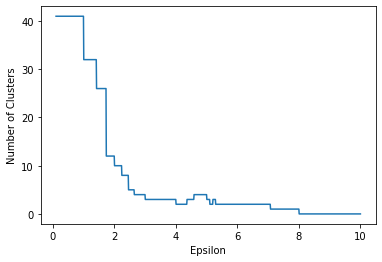

In [19]:
#seeing how clusters vary


x = np.linspace(.1,10,1000)
cluster_length = np.zeros(len(x))
m = 0 
for i in x:
    clustering = DBSCAN(eps=i,min_samples=5).fit(A)
    cluster = clustering.labels_
    cluster_length[m] = max(cluster)
    m = m + 1
plt.plot(x,cluster_length)
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

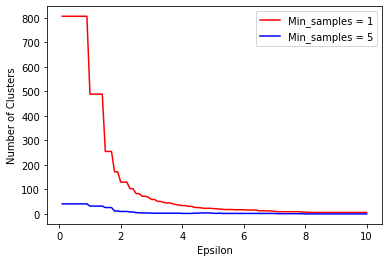

In [21]:
x = np.linspace(.1,10,100)
cluster_length1 = np.zeros(len(x))
m = 0 
for i in x:
    clustering = DBSCAN(eps=i,min_samples=1).fit(A)
    cluster = clustering.labels_
    cluster_length1[m] = max(cluster)
    m = m + 1
    
    
x = np.linspace(.1,10,100)
cluster_length2 = np.zeros(len(x))
m = 0 
for i in x:
    clustering = DBSCAN(eps=i,min_samples=5).fit(A)
    cluster = clustering.labels_
    cluster_length2[m] = max(cluster)
    m = m + 1

plt.plot(x,cluster_length1,'r',label = 'Min_samples = 1')
plt.plot(x,cluster_length2,'b', label = 'Min_samples = 5')
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

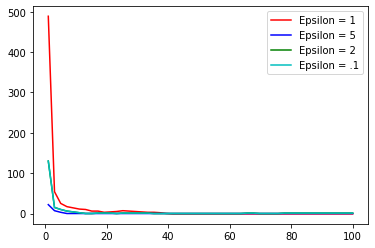

In [23]:
x = np.linspace(1,100)
cluster_length3 = np.zeros(len(x))
m = 0 
for i in x:
    clustering = DBSCAN(eps=1,min_samples=i).fit(A)
    cluster = clustering.labels_
    cluster_length3[m] = max(cluster)
    m = m + 1
    
    
x = np.linspace(1,100)
cluster_length4 = np.zeros(len(x))
m = 0 
for i in x:
    clustering = DBSCAN(eps=5,min_samples=i).fit(A)
    cluster = clustering.labels_
    cluster_length4[m] = max(cluster)
    m = m + 1

x = np.linspace(1,100)
cluster_length5 = np.zeros(len(x))
m = 0 
for i in x:
    clustering = DBSCAN(eps=2,min_samples=i).fit(A)
    cluster = clustering.labels_
    cluster_length5[m] = max(cluster)
    m = m + 1
    
x = np.linspace(1,100)
cluster_length6 = np.zeros(len(x))
m = 0 
for i in x:
    clustering = DBSCAN(eps=.1,min_samples=i).fit(A)
    cluster = clustering.labels_
    cluster_length6[m] = max(cluster)
    m = m + 1

plt.plot(x,cluster_length3,'r',label = 'Epsilon = 1')
plt.plot(x,cluster_length4,'b', label = 'Epsilon = 5')
plt.plot(x,cluster_length5,'g', label = 'Epsilon = 2')
plt.plot(x,cluster_length5,'c', label = 'Epsilon = .1')


plt.legend()
plt.show

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

[[807. 489. 103.  47.  26.  18.  13.   9.   6.   6.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.

[[807. 489. 103.  47.  26.  18.  13.   9.   6.   6.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.

[[807. 489. 103.  47.  26.  18.  13.   9.   6.   6.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.

[[807. 489. 103.  47.  26.  18.  13.   9.   6.   6.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.

[[807. 489. 103.  47.  26.  18.  13.   9.   6.   6.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.   0.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.

[[807. 489. 103.  47.  26.  18.  13.   9.   6.   6.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.   0.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.

[[807. 489. 103.  47.  26.  18.  13.   9.   6.   6.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.   0.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.

[[807. 489. 103.  47.  26.  18.  13.   9.   6.   6.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.   0.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.

[[807. 489. 103.  47.  26.  18.  13.   9.   6.   6.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.   0.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.

[[807. 489. 103.  47.  26.  18.  13.   9.   6.   6.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.   0.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.

[[807. 489. 103.  47.  26.  18.  13.   9.   6.   6.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.   0.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.

[[807. 489. 103.  47.  26.  18.  13.   9.   6.   6.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [255. 163.  29.  17.  11.   7.   5.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [122.  87.  11.  10.   8.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 64.  54.  10.   6.   7.   5.   4.   2.   1.   1.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.   0.]
 [ 41.  32.   8.   3.   3.   2.   2.   1.   0.

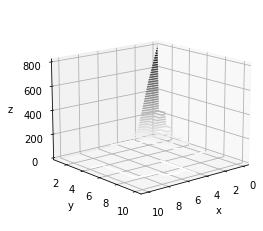

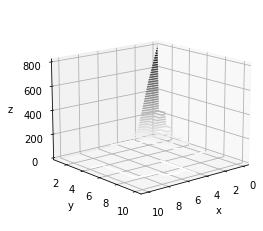

In [25]:
x = np.linspace(1,10)
y = np.linspace(.1,10,10)
cluster_matrix = np.zeros([len(x),len(y)])
m = 0 
n = 0
for i in x:
    m = 0
    for j in y:
        clustering = DBSCAN(eps=j,min_samples=i).fit(A)
        cluster = clustering.labels_
        cluster_matrix[n][m] = max(cluster)
        m = m + 1
    n = n + 1

Y, X = np.meshgrid(y, x)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(Y, X, cluster_matrix, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.view_init(15,50 )
fig